# Descrição do Cenário:
A CerreiraFosta Ltda. é uma empresa especializada em produtos para o lar, como móveis, eletrodomésticos e artigos de decoração.
Apesar de contar com uma base de clientes sólida e uma equipe de vendas dedicada, a empresa está enfrentando dificuldades para alcançar suas metas de vendas. A taxa de conversão de oportunidades em vendas finalizadas está aquém do esperado, e o portfólio de produtos precisa ser otimizado para maximizar o valor das transações.

Recentemente, a CerreiraFosta Ltda. coletou uma grande quantidade de dados sobre seus clientes, suas compras e o seu histórico de vendas. A liderança da empresa acredita que, com uma **análise detalhada desses dados**, será possível **identificar padrões e tendências que possam ajudar a melhorar o desempenho de vendas e orientar estratégias mais eficazes.**

# Problema a Ser Resolvido:
A CerreiraFosta Ltda. precisa de sua ajuda para entender os fatores que influenciam o sucesso das vendas e identificar oportunidades de melhoria.

**A empresa quer respostas para perguntas do tipo:**
- Quais características estão relacionadas ao sucesso das vendas?
- Como a concorrência interfere no desempenho da empresa?
- Existem fatores específicos que indicam que uma oportunidade tem maior chance de ser fechada?
- O que pode ser feito para otimizar as vendas?


#Processo de ETL (Extract, Transform, Load)

Neste notebook, daremos início ao processo de ETL (Extract, Transform, Load), que consiste nas etapas fundamentais para o tratamento de dados: extrair, transformar e carregar. Este processo nos permitirá preparar os dados para análises futuras de forma estruturada e eficiente.

## Entendendo as Bases de Dados

Antes de iniciar o tratamento, é essencial que a equipe tenha um entendimento profundo das bases de dados. Compreender o conteúdo, a estrutura e as características dos dados é um passo indispensável para realizar uma limpeza eficiente e garantir que as transformações futuras sejam adequadas e relevantes para os objetivos do projeto.

Vamos começar importando as bibliotecas que fornecerão as ferramentas necessárias para o processo de ETL. Utilizaremos as seguintes:

- **Pandas**: Para manipulação e análise de dados estruturados em tabelas.  
- **NumPy**: Para realizar operações matemáticas eficientes.
- **Matplotlib**: Para construir visualizações básicas e detalhadas de dados em diversos formatos de gráficos.   
- **Seaborn**: Para criar gráficos estatísticos estilizados e informativos, facilitando a análise visual.  


In [3]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Agora, vamos importar as bases de dados fornecidas pela Cerreira Fosta, no formato CSV, para dar início à análise e ao tratamento dos dados.

In [4]:
# Conectando ao google drive para ter acesso às bases

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importando as bases de dados store.csv e vendas.csv
lojas = pd.read_csv('/content/drive/MyDrive/PTA - IDFin 2024.2/bases + colab/store.csv')
vendas = pd.read_csv('/content/drive/MyDrive/PTA - IDFin 2024.2/bases + colab/train.csv')

<ipython-input-5-5c3fcd4068f3>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  vendas = pd.read_csv('/content/drive/MyDrive/PTA - IDFin 2024.2/bases + colab/train.csv')




---



## Visualizando as Bases

Nesta etapa, vamos executar alguns comandos para obter uma visão geral das bases de dados.


In [ ]:
#paleta de cores para geração de gráficos padronizados
paleta = ["#62e28c", "#4acf7b", "#31bc6a", "#19a959", "#009648","#46a565", "349052", "#237a3e ", "#11652b ", "#004f17"]

###**Base Lojas:**


Primeiro, vamos criar um dicionário para documentar o significado de cada coluna, garantindo que possamos entender claramente o que cada uma representa.

---
**Dicionário dos Dados:**

- **Store:** um ID exclusivo para cada loja;
- **StoreType:** diferencia entre 4 modelos de loja diferentes: a, b, c, d;
- **Assortment:** descreve um nível de sortimento: a = básico, b = extra, c = estendido;
- **CompetitionDistance:** distância em metros até a loja concorrente mais próxima;
- **CompetitionOpenSince[Month/Year]:** fornece o ano e o mês aproximados da abertura do concorrente mais próximo;
- **Promo2:** Promo2 é uma promoção contínua e consecutiva para algumas lojas: 0 = loja não está participando, 1 = loja está participando;
- **Promo2Since[Year/Week]:** descreve o ano e a semana do calendário em que a loja começou a participar do Promo2;
- **PromoInterval:** descreve os intervalos consecutivos em que o Promo2 é iniciado, nomeando os meses em que a promoção é iniciada novamente. Por exemplo, "fev, mai, ago, nov" significa que cada rodada começa em fevereiro, maio, agosto, novembro de qualquer ano para aquela loja.



---





- O comando ***.head()*** verifica as colunas e as primeiras linhas de cada uma. Isso nos ajudará a entender sua estrutura e conteúdo iniciais.

In [ ]:
# Verificando a base lojas completa
lojas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


- O comando ***.shape*** retorna uma tupla com o número de linhas e colunas do DataFrame (respectivamente), fornecendo uma visão rápida da dimensão da base de dados.

In [ ]:
# Verificando o tamanho (linhas, colunas) da base lojas
lojas.shape

(1115, 10)

---
###**Base Vendas:**

Repetiremos o mesmo processo com a Base Vendas:



---

**Dicionário dos Dados:**

- **Store:** Um ID exclusivo para cada loja;
- **DayOfWeek:** Dia da semana (1 = segunda-feira, 7 = domingo);
- **Date:** Data da observação;
- **Sales:** Total de vendas realizadas na loja nesse dia;
- **Customers:** Número de clientes que visitaram a loja nesse dia;
- **Open:** Indicador se a loja estava aberta (1 = aberta, 0 = fechada);
- **Promo:** Indicador se havia uma promoção naquele dia (1 = sim, 0 = não);
- **StateHoliday:** Indicador de feriado estadual (1 = feriado, 0 = não feriado);
- **SchoolHoliday:** Indicador de feriado escolar (1 = feriado escolar, 0 = não feriado escolar).
---

In [ ]:
# Verificando a base vendas completa
vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
# Verificando o tamanho (linhas, colunas) da base vendas
vendas.shape

(1017209, 9)

---
## Tratando os Dados

Agora, podemos examinar as bases de dados com mais profundidade para iniciar o tratamento. Nesta etapa, utilizaremos comandos como *info()*, *describe()* e *isnull()* para entender melhor a estrutura dos dados e identificar possíveis problemas, como valores ausentes ou inconsistências.

###**Base Lojas**

O comando ***.info()*** Exibe informações gerais sobre o DataFrame, como o número de entradas, tipos de dados das colunas, e quantidade de valores não nulos.

In [ ]:
# Verificando informações da base lojas
lojas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


Vamos verificar se há dados duplicados nessa base

In [ ]:
# Verificando a duplicação de linhas
lojas[lojas.duplicated()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


- **OBS**: NÃO HÁ LINHAS DUPLICADAS

Agora, vamos visualizar os dados faltantes da base 'lojas'

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


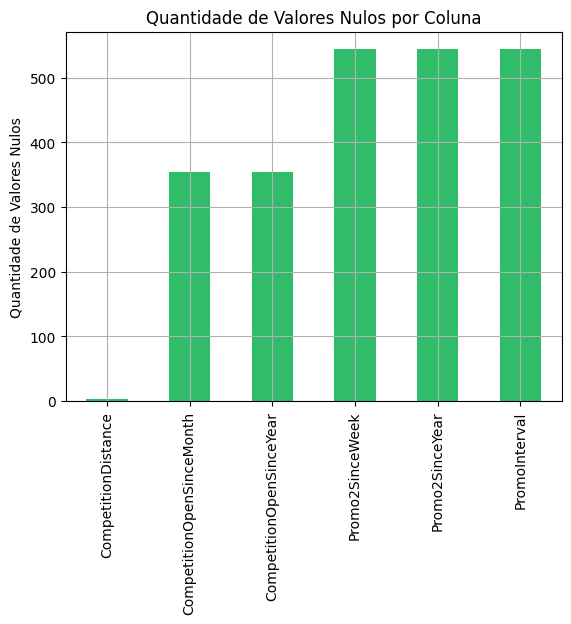

In [ ]:
# Gera um gráfico de barras que mostra a quantidade de valores nulos em cada coluna da base lojas que contém valores nulos
lojas.isnull().sum()[lambda x: x > 0].plot(
    kind='bar', color='#31bc6a', grid=True, ylabel="Quantidade de Valores Nulos"
)
plt.title("Quantidade de Valores Nulos por Coluna")


# Impressão númerica da quantidade de dados nulos
missing_data = lojas.isnull().sum()
print(missing_data)

Identificamos a presença de valores nulos em algumas colunas da base de dados **Lojas**. Vamos registrar essa informação para uma análise mais detalhada e tratamento adequado posteriormente.

In [ ]:
# Mostra as linhas em que a coluna CompetitionOpenSinceMonth tem valores ausentes (NaN)
lojas[lojas['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Mostra as linhas em que a coluna CompetitionOpenSinceYear tem valores ausentes (NaN)
lojas[lojas['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


É possível perceber que as duas colunas 'CompetitionOpenSince...' possuem valores faltantes nas mesmas linhas, já que estão correlacionadas.





In [ ]:
# Mostra as linhas em que a coluna Promo2 tem valores ausentes (NaN)
lojas[lojas['Promo2'] == 0]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN


Observamos que as colunas **'Promo2SinceWeek'**, **'Promo2SinceYear'** e **'PromoInterval'** apresentam valores faltantes nas mesmas linhas. Isso ocorre porque essas colunas estão correlacionadas e diretamente relacionadas à coluna **'Promo2'**, que indica a presença ou ausência de promoções contínuas.

Para tratar esses dados faltantes, nos basearemos nas seguintes conclusões:

1. Se existe `CompetitionOpenSinceMonth` e/ou `CompetitionOpenSinceYear` e não tem `CompetitionDistance` -> preencher a `CompetitionDistance` com a **mediana**

2. Se não existe a `CompetitionDistance` e não existe `CompetitionOpenSinceMonth` e `CompetitionOpenSinceYear` -> **deixar nulo**

3. Se existe a `CompetitionDistance` e não existe `CompetitionOpenSinceMonth` e/ou `CompetitionOpenSinceYear` -> **substituir pela moda**

4. Se `Promo2 == 0` -> deixar `Promo2SinceYear` e `Promointerval` como **nulo**, visto que essas duas colunas estão diretamente relacionadas à Promo2.




In [6]:
# Preencher `CompetitionDistance` com a mediana se `CompetitionMonth` e/ou `CompetitionYear` existirem e `CompetitionDistance` for nulo

median_competition_distance = lojas['CompetitionDistance'].median()
lojas.loc[
    lojas['CompetitionDistance'].isnull() &
    (lojas['CompetitionOpenSinceMonth'].notnull() | lojas['CompetitionOpenSinceYear'].notnull()),
    'CompetitionDistance'
] = median_competition_distance

In [7]:
# Deixar `CompetitionDistance` como nulo se `CompetitionMonth` e `CompetitionYear` forem nulos

lojas.loc[
    lojas['CompetitionDistance'].isnull() &
    lojas['CompetitionOpenSinceMonth'].isnull() &
    lojas['CompetitionOpenSinceYear'].isnull(),
    'CompetitionDistance'
] = None

In [8]:
# Substituir `CompetitionMonth` e/ou `CompetitionYear` por sua moda se `CompetitionDistance` existir e eles forem nulos
mode_competition_month = lojas['CompetitionOpenSinceMonth'].mode()[0]
mode_competition_year = lojas['CompetitionOpenSinceYear'].mode()[0]

lojas.loc[
    lojas['CompetitionOpenSinceMonth'].isnull() & lojas['CompetitionDistance'].notnull(),
    'CompetitionOpenSinceMonth'
] = mode_competition_month

lojas.loc[
    lojas['CompetitionOpenSinceYear'].isnull() & lojas['CompetitionDistance'].notnull(),
    'CompetitionOpenSinceYear'
] = mode_competition_year

In [9]:
# Se `Promo2 == 0`, deixar `Promo2SinceYear` e `PromoInterval` como nulo

lojas.loc[lojas['Promo2'] == 0, ['Promo2SinceYear', 'PromoInterval']] = None

Vamos analisar o quantitativo de dados faltantes após as instruções acima

In [10]:
# Impressão númerica da quantidade de dados nulos
missing_data = lojas.isnull().sum()
missing_data

,0
Store,0
StoreType,0
Assortment,0
CompetitionDistance,3
CompetitionOpenSinceMonth,3
CompetitionOpenSinceYear,3
Promo2,0
Promo2SinceWeek,544
Promo2SinceYear,544
PromoInterval,544


Tendo em vista que consideramos que se deve deixar nulo se não existe a CompetitionDistance e não existe CompetitionOpenSinceMonth e CompetitionOpenSinceYear e que se Promo2 == 0 deve-se deixar Promo2SinceYear e Promointerval como nulo (visto que essas duas colunas estão diretamente relacionadas à Promo2), então está tudo certo

 Vamos gerar um histograma para a visualização dos dados de cada coluna

Text(0.5, 0.93, 'Distribuição das Variáveis Numéricas')

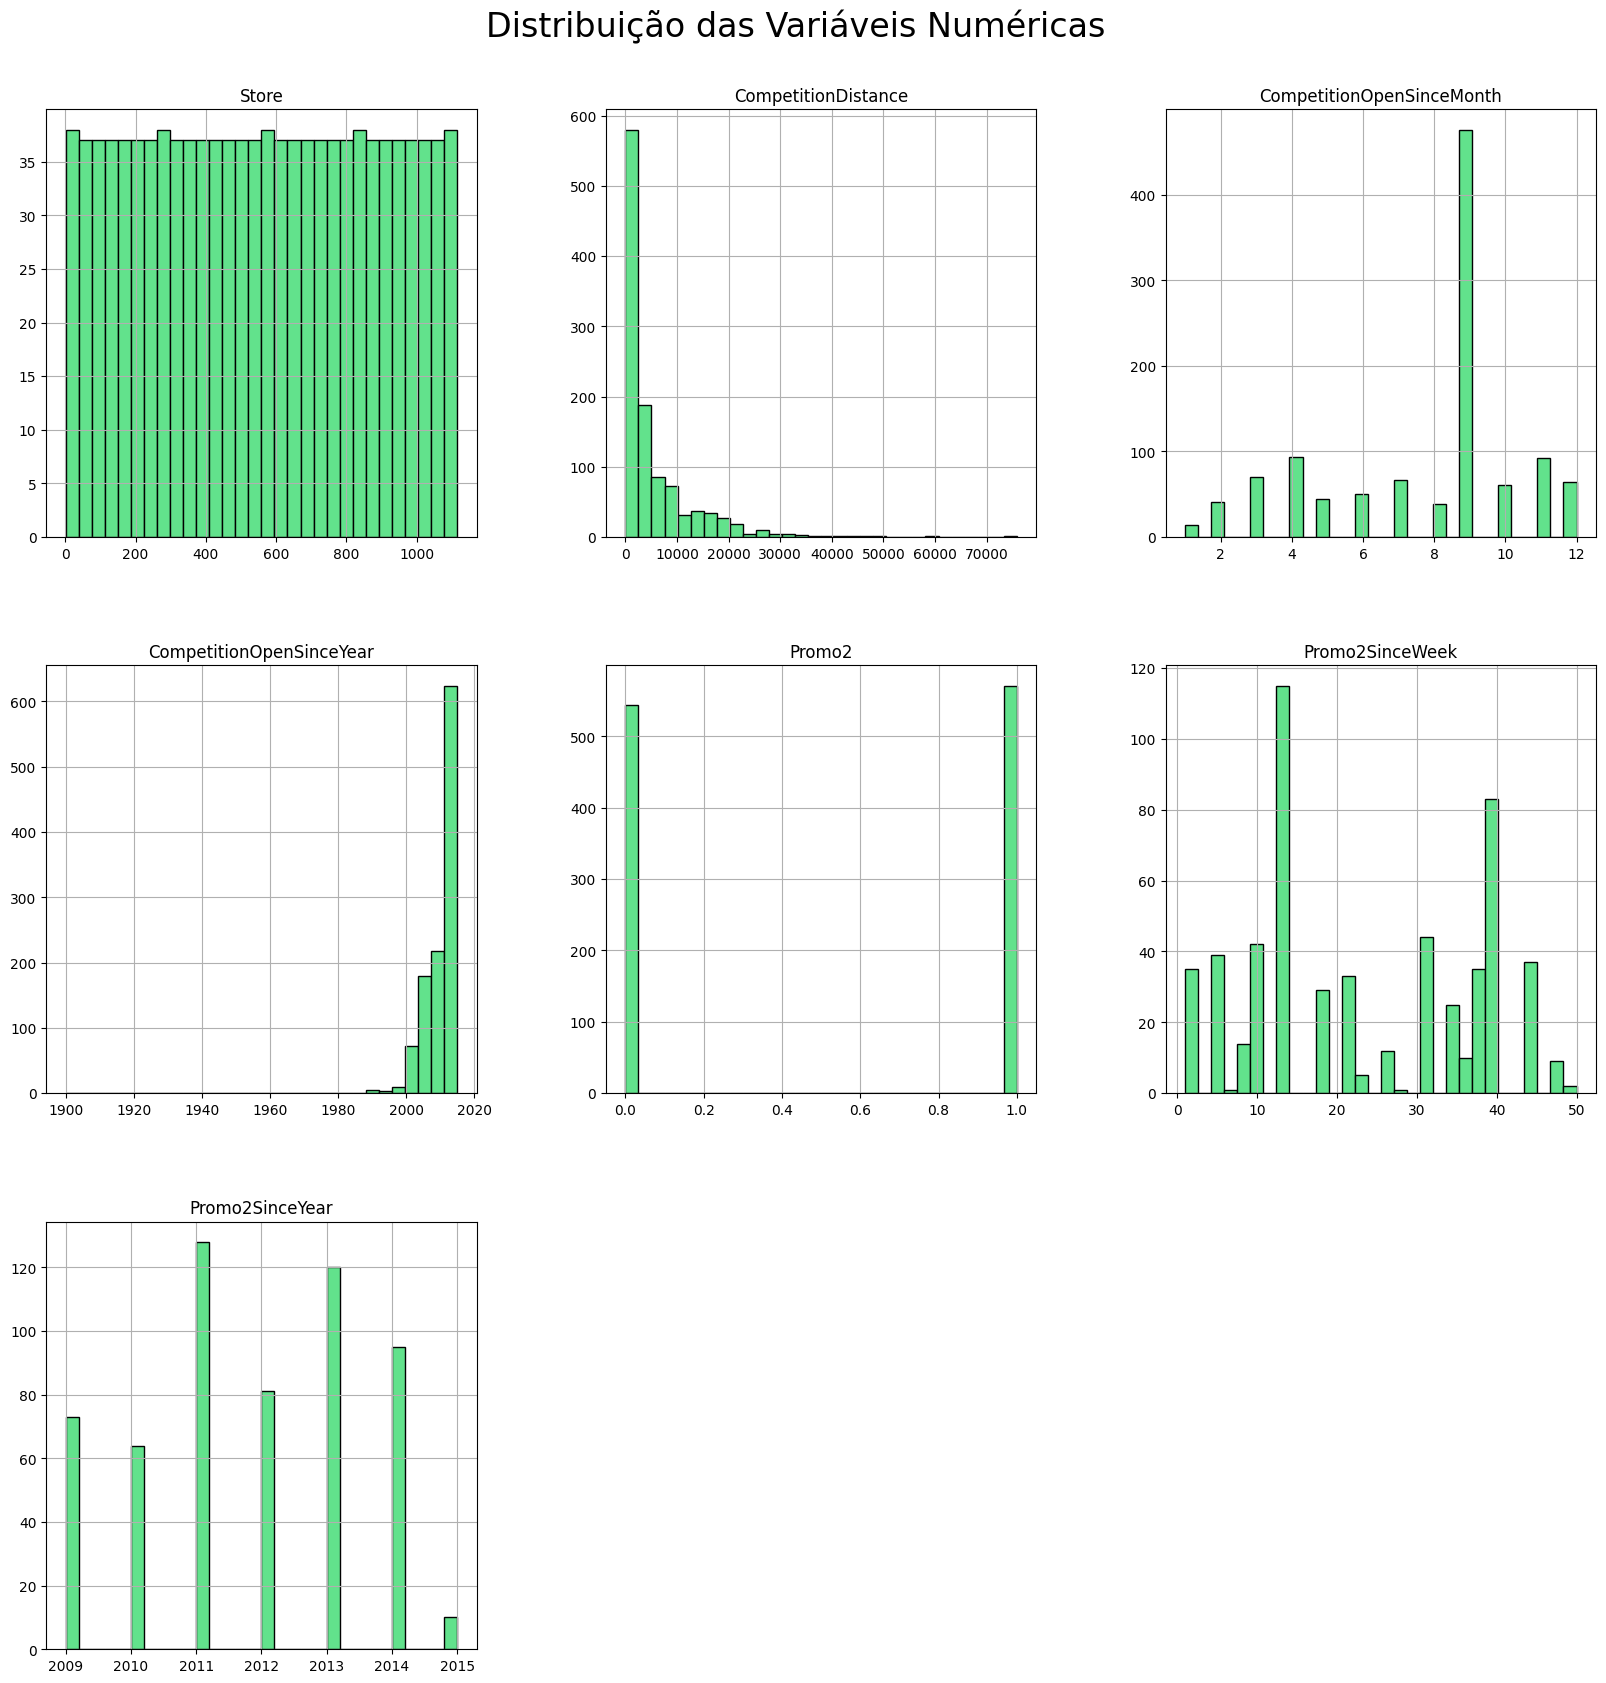

In [11]:
#store.hist(bins=30, figsize=(20, 20), color='#62e28c')
#linha eixo x: representa os valores das variáveis

# Cria um histograma para cada variável numérica da base lojas e exibe todos os gráficos em um layout organizado
lojas.hist(bins=30, figsize=(20, 20), color='#62e28c', edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=24, y=0.93)

#### Análise dos Gráficos da Base Lojas
- **Store**: Representa o ID das lojas, com distribuição uniforme. É útil para identificação, mas não oferece insights analíticos diretos.

- **CompetitionDistance**:  A maioria das lojas tem concorrentes localizados a até 3 km de distância. Valores extremos indicam lojas em regiões com concorrência distante ou inexistente, podendo ser um diferencial estratégico.

- **CompetitionOpenSinceMonth**: A distribuição é relativamente uniforme entre os meses, indicando que a abertura de concorrentes não segue uma sazonalidade específica.

- **CompetitionOpenSinceYear**: Mostra que a maioria das concorrências começou após o ano 2000, refletindo o crescimento recente no mercado.

- **Promo2**: Demonstra se a loja participa ou não da Promoção 2. Aproximadamente metade das lojas participa, sugerindo uma estratégia diversificada para essa promoção.

- **Promo2SinceWeek:** A maioria dos valores concentra-se nas semanas iniciais, indicando que várias lojas aderiram à Promoção 2 mais cedo. Há certa dispersão, mas sem um padrão evidente.

- **Promo2SinceYear:** Assim como em `CompetitionOpenSinceYear`, a maioria das promoções foi iniciada em anos recentes, possivelmente alinhadas com estratégias de modernização e adaptação ao mercado.

In [ ]:
# Verificando informações da base lojas
lojas.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,1112.000000,1112.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.785072,2010.035971,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,2.782165,5.506118,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,6.000000,2008.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,9.000000,2012.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,9.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


Agora, podemos observar que não há aparentes inconsistências nos dados. No entanto, vale destacar que a função `describe()` do pandas ignora automaticamente os valores nulos ao calcular métricas estatísticas como média, mediana e desvio padrão. Isso significa que, mesmo que existam valores ausentes no DataFrame, eles não influenciam os resultados das análises descritivas.

### Base Vendas

Vamos repetir o processo para a outra base de dados:

In [ ]:
# Verificando informações da base final e conferindo a exclusão da coluna
vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
# Verificando a duplicação de linhas
vendas[vendas.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday


- **OBS**: NÃO HÁ LINHAS DUPLICADAS

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64


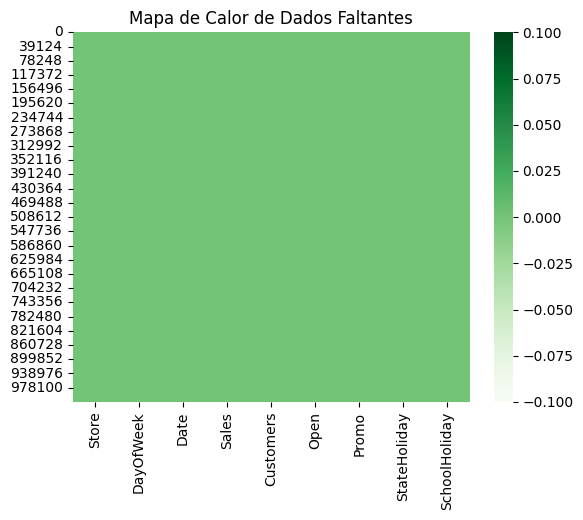

In [ ]:
# Cria um mapa de calor (heatmap) para visualizar os dados como uma matriz e identificar as colunas com valores ausentes
# A cor indicada por "- 0.000" significa que não há dados nulos, enquanto as cores mais escuras indicam que há
sns.heatmap(vendas.isnull(), cmap='Greens', cbar=True)

plt.title("Mapa de Calor de Dados Faltantes")

# Impressão númerica da quantidade de dados nulos
missing_data = vendas.isnull().sum()
print(missing_data)

Não há dados nulos nessa base.

In [12]:
# Vamos observar as últimas linhas da base, por meio do comando '.tail()'
vendas.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


 Vamos gerar um histograma para a visualização dos dados de cada coluna

array([[<Axes: title={'center': 'Store'}>,
        <Axes: title={'center': 'DayOfWeek'}>,
        <Axes: title={'center': 'Sales'}>],
       [<Axes: title={'center': 'Customers'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'Promo'}>],
       [<Axes: title={'center': 'SchoolHoliday'}>, <Axes: >, <Axes: >]],
      dtype=object)

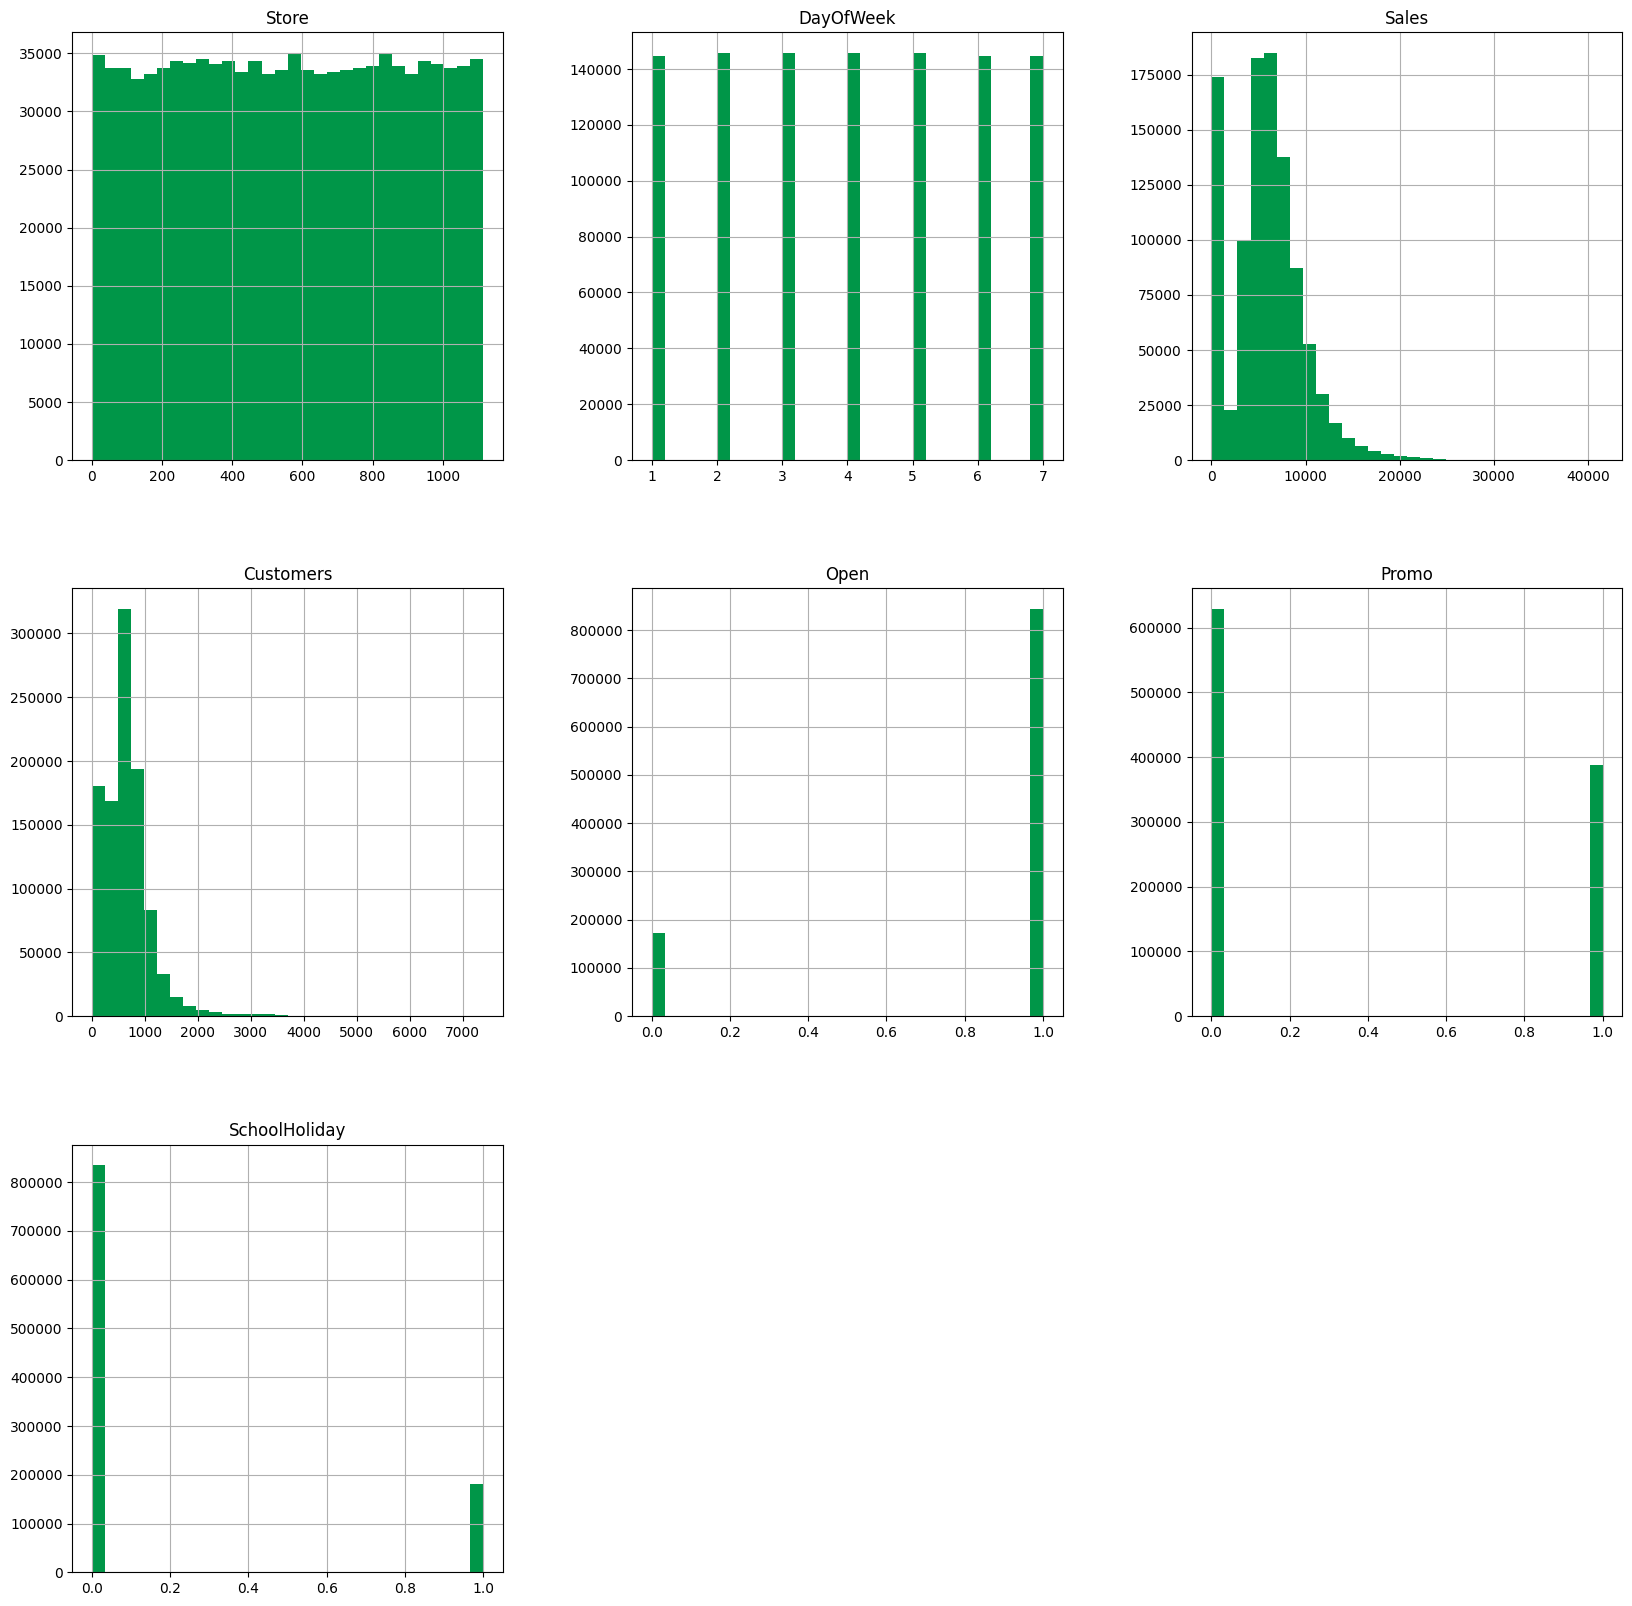

In [ ]:
vendas.hist(bins=30, figsize=(20, 20), color='#009648')

#### Análise dos Gráficos das Colunas da Base Vendas

- **Store**: A distribuição uniforme reflete o ID único de cada loja. Essa variável serve apenas como identificador e, portanto, não oferece insights diretos.

- **DayOfWeek**:  A quantidade de transações é semelhante entre os dias úteis, com uma redução acentuada no dia 7. Isso sugere que as lojas podem operar em horário reduzido ou estar fechadas aos domingos.

- **Sales**: A maior parte das vendas está concentrada entre 0 e 6 mil euros, com valores mais altos se tornando progressivamente menos frequentes. Isso indica que as lojas possuem um desempenho médio estável, mas picos de vendas podem estar associados a promoções, sazonalidade ou eventos específicos.

- **Customers**: A maior concentração está em torno de 600 clientes por dia, com um número máximo alcançando cerca de 7 mil. Isso mostra uma distribuição enviesada, com a maioria das lojas recebendo um volume moderado de clientes e algumas poucas com fluxos muito altos.

- **Promo**: Revela que quase metade das lojas participa de promoções. Essa diferenciação pode ser analisada em relação ao impacto que as promoções têm sobre as vendas e o número de clientes.

- **SchoolHolliday:** A maior parte das operações das lojas ocorre fora de feriados escolares, o que indica que esses períodos não coincidem significativamente com o volume de transações. É possível que feriados escolares tenham pouca influência direta no desempenho das lojas.


In [13]:
# Verificando informações da base vendas final
vendas.describe().round(2)

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.0,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.0,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.0,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.0,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.0,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.0,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.0,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.0,41551.00,7388.00,1.00,1.00,1.00


Mesmo após excluir os períodos em que as lojas estavam fechadas, observamos que há dias em que algumas lojas registraram 0 vendas e 0 clientes. Essa ocorrência merece uma análise mais aprofundada para entender suas possíveis causas.

In [ ]:
vendas[vendas['Sales'] == 0]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [ ]:
filtro = vendas.loc[(vendas['Sales'] == 0) & (vendas['Customers'] == 0)]
filtro

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
291,292,5,2015-07-31,0,0,0,1,0,1
875,876,5,2015-07-31,0,0,0,1,0,1
1406,292,4,2015-07-30,0,0,0,1,0,1
1990,876,4,2015-07-30,0,0,0,1,0,1
2521,292,3,2015-07-29,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [14]:
# Vamos verificar as linhas que não são numéricas

vendas['Sales'] = pd.to_numeric(vendas['Sales'], errors='coerce')
vendas['Customers'] = pd.to_numeric(vendas['Customers'], errors='coerce')

# Filtrar as linhas onde Sales e Customers são iguais a 0
filtro = (vendas['Sales'] == 0) & (vendas['Customers'] == 0)

# Calcular o percentual de linhas que atendem à condição
percentual = filtro.mean() * 100

# Exibir o resultado formatado
print(f'Sales e Customers = 0: {percentual}%')

Sales e Customers = 0: 16.99444263666562%


Isso pode indicar uma possível falha no processo de coleta de dados. No entanto, como representam uma parcela muito pequena da base, optaremos por mantê-los para preservar a integridade e a completude do conjunto de dados.

#Junção das bases

In [15]:
vendas.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [16]:
lojas.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,None
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,None


É possível perceber que temos a coluna 'Store' em comum nas duas bases.

Essa informação nos permite combinar as duas bases, para trabalharmos apenas com uma.

In [17]:
# Junta as duas bases com base na coluna em comum 'Store'
data_final = pd.merge(vendas, lojas, how = 'inner', on = 'Store')

Com a junção das duas bases feita, podemos analisar o tamanho (linhas x colunas dela)

In [18]:
data_final.shape

(1017209, 18)

Vamos verificar se há linhas duplicadas



In [19]:
# Verificando a duplicação de linhas
data_final[data_final.duplicated()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


- *OBS*: não há linhas duplicadas



---



Vamos analisar os dados nulos da nova base

In [20]:
# Verificar onde há valores nulos após o merge
data_final[data_final.isnull().any(axis=1)]


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,None
5,6,5,2015-07-31,5651,589,1,1,0,1,a,a,310.0,12.0,2013.0,0,NaN,NaN,None
6,7,5,2015-07-31,15344,1414,1,1,0,1,a,c,24000.0,4.0,2013.0,0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017201,1108,2,2013-01-01,0,0,0,0,a,1,a,a,540.0,4.0,2004.0,0,NaN,NaN,None
1017203,1110,2,2013-01-01,0,0,0,0,a,1,c,c,900.0,9.0,2010.0,0,NaN,NaN,None
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,None
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,9.0,2013.0,0,NaN,NaN,None


In [21]:
# Impressão númerica da quantidade de dados nulos
data_final.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


Percebemos que a quantidade de valores nulos aumentou, então vamos realizar o tratamento novamente conforme as instruções feitas com a base Store.

In [22]:
# Calculando a mediana e a moda necessárias para o preenchimento
median_competition_distance = data_final['CompetitionDistance'].median()
mode_competition_month = data_final['CompetitionOpenSinceMonth'].mode()[0]
mode_competition_year = data_final['CompetitionOpenSinceYear'].mode()[0]

# Preencher CompetitionDistance com a mediana onde há mês/ano de competição
data_final.loc[
    (data_final['CompetitionDistance'].isnull()) &
    (data_final['CompetitionOpenSinceMonth'].notnull() | data_final['CompetitionOpenSinceYear'].notnull()),
    'CompetitionDistance'
] = median_competition_distance

# Manter nulos quando não há informações de competição
# Já mantido automaticamente no 'merge'

# Preencher CompetitionMonth e CompetitionYear com a moda onde há distância de competição
data_final.loc[
    (data_final['CompetitionOpenSinceMonth'].isnull()) & data_final['CompetitionDistance'].notnull(),
    'CompetitionOpenSinceMonth'
] = mode_competition_month

data_final.loc[
    (data_final['CompetitionOpenSinceYear'].isnull()) & data_final['CompetitionDistance'].notnull(),
    'CompetitionOpenSinceYear'
] = mode_competition_year

# Ajustar Promo2, Promo2SinceYear e PromoInterval
data_final.loc[data_final['Promo2'] == 0, ['Promo2SinceYear', 'PromoInterval']] = None

# Verificando os valores nulos após o tratamento
print("Valores nulos após o tratamento:")
print(data_final.isnull().sum())

# Comparando com os valores nulos originais
original_nulls = {
    'CompetitionDistance': 3,
    'CompetitionOpenSinceMonth': 3,
    'CompetitionOpenSinceYear': 3,
    'Promo2SinceWeek': 544,
    'Promo2SinceYear': 544,
    'PromoInterval': 544
}

print("\nDiferença em relação aos valores originais:")
for column, original_count in original_nulls.items():
    final_count = data_final[column].isnull().sum()
    print(f"{column}: Original = {original_count}, Atual = {final_count}, Diferença = {final_count - original_count}")


Valores nulos após o tratamento:
Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth      2642
CompetitionOpenSinceYear       2642
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

Diferença em relação aos valores originais:
CompetitionDistance: Original = 3, Atual = 2642, Diferença = 2639
CompetitionOpenSinceMonth: Original = 3, Atual = 2642, Diferença = 2639
CompetitionOpenSinceYear: Original = 3, Atual = 2642, Diferença = 2639
Promo2SinceWeek: Original = 544, Atual = 508031, Dif

Esses dados nulos correspondem aos dados nulos das lojas analisadas nessas condições no tratamento da base Store. Como há repetições dessas lojas na nova base, então o número de dados nulos aumenta normalmente. Logo, está tudo certo.










In [23]:
lojas[lojas['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,None
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,None
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


In [24]:
# Mostrando as linhas que possuem valores nulos na coluna CompetitionDistance

data_final[data_final['CompetitionDistance'].isnull()]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,None
621,622,5,2015-07-31,6306,540,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None
878,879,5,2015-07-31,6000,466,1,1,0,0,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1405,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,None
1736,622,4,2015-07-30,5412,406,1,1,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1015601,622,3,2013-01-02,4080,451,1,0,0,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None
1015858,879,3,2013-01-02,3077,326,1,0,0,1,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"
1016385,291,2,2013-01-01,0,0,0,0,a,1,d,a,NaN,NaN,NaN,0,NaN,NaN,None
1016716,622,2,2013-01-01,0,0,0,0,a,1,a,c,NaN,NaN,NaN,0,NaN,NaN,None


Vamos visualizar os dados do início e do final da base final para ter uma noção melhor da distribuição desses dados na tabela

In [25]:
data_final.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,None
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,None
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,None


## Criando Novas Colunas

Para facilitar análises exploratórias mais detalhadas, é recomendável criar novas colunas na base de dados final que separem as informações de data em **dia**, **mês** e **ano**. Essa abordagem permite identificar tendências sazonais, variações mensais ou padrões relacionados a dias específicos, tornando a análise mais precisa e prática.

In [26]:
# Vamos criar colunas novas com os valores 'Year', 'Month' e 'Day'

data_final['Year'] = pd.DatetimeIndex(data_final['Date']).year
data_final['Month'] = pd.DatetimeIndex(data_final['Date']).month
data_final['Day'] = pd.DatetimeIndex(data_final['Date']).day

# Salvando a Base Final

Após concluir a montagem e tratamento da base final, vamos salvá-la no formato csv para seguir para EDA que está localizada nesse notebook.

In [27]:
data_final.to_csv('base_dados_final.csv', index=True)